In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import random

# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [2]:
df = pd.read_csv('blobs2.csv')
dfx = df['x'].values
dfy = df['y'].values
dfl = df['label'].values

X = np.array([dfx, dfy]).transpose()
y = np.array(dfl)

/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


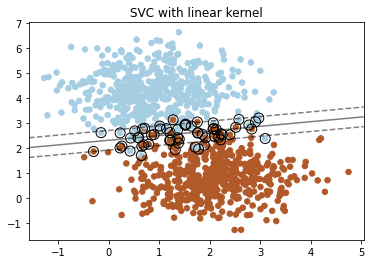

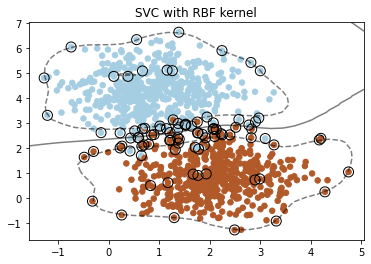

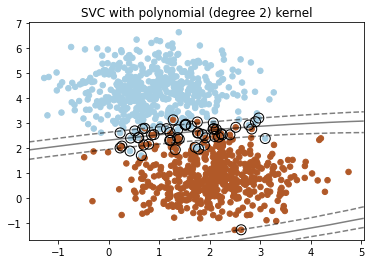

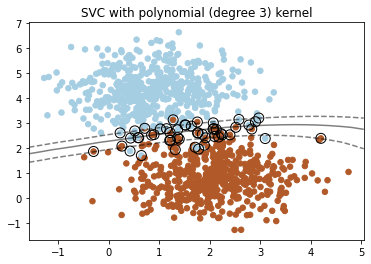

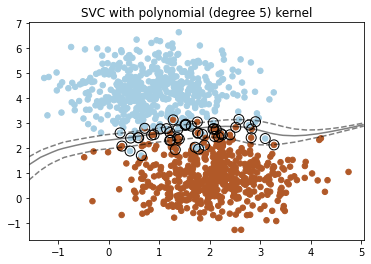

In [7]:
lin_svc = SVC(kernel='linear').fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly2_svc = SVC(kernel='poly', degree=2).fit(X, y)
poly3_svc = SVC(kernel='poly', degree=3).fit(X, y)
poly5_svc = SVC(kernel='poly', degree=5).fit(X, y)

models = [lin_svc, rbf_svc, poly2_svc, poly3_svc, poly5_svc]

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 5) kernel']

for i in range(5):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = models[i].decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(models[i].support_vectors_[:, 0], models[i].support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(titles[i])
    plt.show()


### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

##### Cancer

In [8]:
print('SVM')
df = pd.read_csv('cancer.csv')
y = (df['label'] == 'M').values
X = df.drop('label', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
start_time1 = datetime.now()
lin_svc = SVC().fit(X_train, y_train)
print("fitting time: ", datetime.now() - start_time1)
start_time2 = datetime.now()
pred = lin_svc.predict(X_test)
print("predicting time: ", datetime.now() - start_time1)
print("accuracy: ", accuracy_score(y_test, pred))

print('\nRandom Forest')
start_time1 = datetime.now()
clf = RandomForestClassifier()
clf.fit(X, y)
print("fitting time: ", datetime.now() - start_time1)
start_time2 = datetime.now()
pred = clf.predict(X_test)
print("predicting time: ", datetime.now() - start_time1)
print("accuracy: ", accuracy_score(y_test, pred))

SVM
fitting time:  0:00:00.015062
predicting time:  0:00:00.018524
accuracy:  0.6228070175438597

Random Forest
fitting time:  0:00:00.015519
predicting time:  0:00:00.017183
accuracy:  1.0


/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Spam

In [9]:
df = pd.read_csv('spam.csv')
y = df['label'].values
X = df.drop('label', axis=1).values

print('SVM')
df = pd.read_csv('spam.csv')
y = df['label'].values
X = df.drop('label', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
start_time1 = datetime.now()
lin_svc = SVC().fit(X_train, y_train)
print("fitting time: ", datetime.now() - start_time1)
start_time2 = datetime.now()
pred = lin_svc.predict(X_test)
print("predicting time: ", datetime.now() - start_time2)
print("accuracy: ", accuracy_score(y_test, pred))

print('\nRandom Forest')
clf = RandomForestClassifier()
start_time1 = datetime.now()
clf.fit(X, y)
print("fitting time: ", datetime.now() - start_time1)
start_time2 = datetime.now()
pred = clf.predict(X_test)
print("predicting time: ", datetime.now() - start_time2)
print("accuracy: ", accuracy_score(y_test, pred))

SVM


/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fitting time:  0:00:00.970374
predicting time:  0:00:00.185063
accuracy:  0.8447339847991314

Random Forest
fitting time:  0:00:00.057426
predicting time:  0:00:00.002488
accuracy:  0.992399565689468


/home/cocos/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
